# What is K-Nearest Neighbors?

## Introduction  
K-Nearest Neighbors (KNN) is a straightforward and commonly used supervised learning algorithm for both classification and regression problems. It works on the principle that data points with similar features are likely to be close together in the feature space. KNN makes predictions for new data points by looking at the "k" closest points in the training set and using their values or labels to determine the output. Because of its simplicity and effectiveness, KNN is often used in a wide range of machine learning tasks.

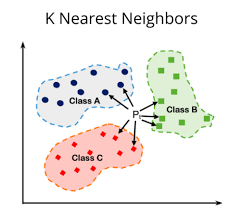

## How does K-Nearest Neighbors work?  
The KNN algorithm follows a simple process:

- **Choosing the Value of "K"**: Select the number of neighbors (K) to consider when making a prediction. A good "K" balances overfitting and underfitting.  
- **Calculating Distances**: Measure the distance between the new data point and every point in the training data. Common distance measures include Euclidean, Manhattan, and Minkowski.  
- **Finding Nearest Neighbors**: Sort all the training points by distance and select the "K" closest ones.  
- **Making a Prediction**:  
  - **Classification**: Assign the class that appears most often among the "K" nearest neighbors.  
  - **Regression**: Take the average (or weighted average) of the values of the "K" neighbors to get the predicted value.

## Choosing the Optimal "K" Value  
The value of "K" can have a big impact on model performance:

- **Small "K"**: The model becomes too sensitive to noise in the data, which can lead to overfitting.  
- **Large "K"**: The model becomes too general, possibly missing patterns in the data, leading to underfitting.  

Cross-validation is a common technique to test different "K" values and choose the one that gives the best results.

## Distance Metrics in KNN  
The distance metric determines how the model measures similarity between data points:

- **Euclidean Distance**: Measures the straight-line distance between two points. It’s the most frequently used metric.  
- **Manhattan Distance**: Measures the path between two points by only moving along grid lines. Useful for grid-like data.  
- **Minkowski Distance**: A general form that includes both Euclidean and Manhattan distances depending on the parameter used.  

The best distance metric depends on the dataset and the problem being solved.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# !pip install -U imbalanced-learn
from imblearn.over_sampling import SMOTE

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

filename = r"C:\Users\pjs5\Downloads\diabetes_dataset_with_notes.csv"
df = pd.read_csv(filename)

df = df.drop(columns=['year', 'clinical_notes'])

df = pd.get_dummies(df, drop_first=True)

X = df.drop(columns=['diabetes'])
y = df['diabetes']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

smote = SMOTE(random_state=14)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

scaler = StandardScaler()
X_train_balanced_scaled = scaler.fit_transform(X_train_balanced)
X_test_scaled = scaler.transform(X_test)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_balanced_scaled, y_train_balanced)

y_pred = knn.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Saving diabetes_dataset_with_notes.csv to diabetes_dataset_with_notes.csv
Accuracy: 0.92185
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.99      0.96     18297
           1       0.64      0.19      0.29      1703

    accuracy                           0.92     20000
   macro avg       0.78      0.59      0.63     20000
weighted avg       0.90      0.92      0.90     20000



# Confusion Matrix

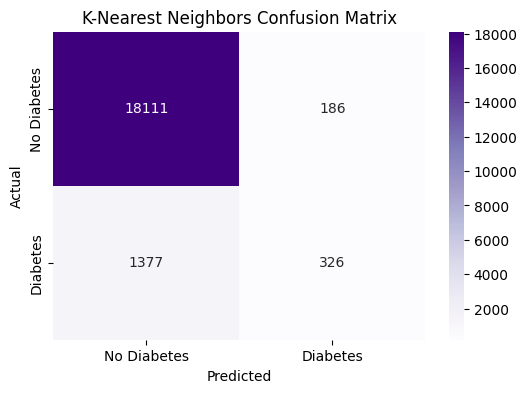

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d',
            xticklabels=['No Diabetes', 'Diabetes'],
            yticklabels=['No Diabetes', 'Diabetes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('K-Nearest Neighbors Confusion Matrix')
plt.show()



This model only predicts people with diabetes accurately only 19.14% of the time which is extremely poor performance. The fact that this model is limited to using a very simplistic metric like distance prevents it from being able to classify the dataset well considering the complex nature of the decision boundary.



## KNN From Scratch

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from scipy.stats import mode
from sklearn.neighbors import KNeighborsClassifier

class KNNClassifier:
    def __init__(self, k):
        self.k = k

    def fit(self, X_train, y_train):
        self.X_train = X_train.values if isinstance(X_train, pd.DataFrame) else X_train
        self.y_train = y_train.values.ravel() if isinstance(y_train, pd.Series) else y_train.ravel()
        self.num_samples, self.num_features = self.X_train.shape

    def predict(self, X_test, max_samples=10):
        self.X_test = X_test.values if isinstance(X_test, pd.DataFrame) else X_test
        self.num_test_samples = self.X_test.shape[0]

        limit = min(self.num_test_samples, max_samples) if max_samples is not None else self.num_test_samples
        predictions = np.zeros(limit)

        #Impose limit on test samples because scratch implementation is slow
        print('Total predictions to run:', limit)

        for i in range(limit):
            print('iter', i)
            test_point = self.X_test[i]
            neighbors = self.get_k_nearest_neighbors(test_point)
            predictions[i] = mode(neighbors, keepdims=False).mode

        return predictions

        return predictions
    def get_k_nearest_neighbors(self, test_point):
        distances = np.array([
            self.euclidean_distance(test_point, train_point)
            for train_point in self.X_train
        ])
        sorted_indices = distances.argsort()
        nearest_labels = self.y_train[sorted_indices][:self.k]
        return nearest_labels.ravel()  # flatten for mode()

    def euclidean_distance(self, x1, x2):
        return np.sqrt(np.sum((x1 - x2) ** 2))

# Main execution block
def main():
 
    df = pd.read_csv(r"C:\Users\peter\Downloads\archive (4)\diabetes_dataset_with_notes.csv")
    df = df.drop(columns=['year', 'clinical_notes'])
    df = pd.get_dummies(df, drop_first=True)

    X = df.drop(columns=['diabetes'])
    y = df['diabetes']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=10, random_state=0)

    custom_knn = KNNClassifier(k=3)
    custom_knn.fit(X_train, y_train)

    sklearn_knn = KNeighborsClassifier(n_neighbors=3)
   
    sklearn_knn.fit(X_train, y_train)

    y_pred_custom = custom_knn.predict(X_test)
    y_pred_sklearn = sklearn_knn.predict(X_test)

    # Calculate accuracy for both models
    accuracy_custom = np.mean(y_pred_custom == y_test) * 100
    accuracy_sklearn = np.mean(y_pred_sklearn == y_test) * 100

    print(f"Accuracy (Custom KNN):    {accuracy_custom:.2f}%")
    print(f"Accuracy (scikit-learn): {accuracy_sklearn:.2f}%")

if __name__ == "__main__":
    main()

cp1
cp2
cp3
cp4
Total predictions to run: 10
iter 0
iter 1
iter 2
iter 3
iter 4
iter 5
iter 6
iter 7
iter 8
iter 9
cp5
cp6
Accuracy (Custom KNN):    90.00%
Accuracy (scikit-learn): 90.00%
